In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [102]:
#Read csv
df = pd.read_csv("diamonds_data.csv",sep=';',encoding= 'latin-1')

In [148]:
#EDA
df.head()

,carat,depth,table,Label,Label_cut,Label_color,Label_clarity
0,0.23,61.5,55.0,4,1,3,3
1,0.21,59.8,61.0,4,1,2,2
2,0.23,56.9,65.0,4,1,4,4
3,0.29,62.4,58.0,4,5,5,5
4,0.31,63.3,58.0,4,6,3,3


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  object 
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  object 
 8   y        53940 non-null  object 
 9   z        53940 non-null  object 
 10  price    53940 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.5+ MB


In [105]:
df.describe()

,index,depth,table
count,53940.000000,53940.000000,53940.000000
mean,26970.500000,61.749405,57.457184
std,15571.281097,1.432621,2.234491
min,1.000000,43.000000,43.000000
25%,13485.750000,61.000000,56.000000
50%,26970.500000,61.800000,57.000000
75%,40455.250000,62.500000,59.000000
max,53940.000000,79.000000,95.000000


In [106]:
df.groupby(by='price').count()

,index,carat,cut,color,clarity,depth,table,x,y,z
price,,,,,,,,,,
High,2308,2308,2308,2308,2308,2308,2308,2308,2308,2308
Low,11271,11271,11271,11271,11271,11271,11271,11271,11271,11271
Medium,4109,4109,4109,4109,4109,4109,4109,4109,4109,4109
Very High,1589,1589,1589,1589,1589,1589,1589,1589,1589,1589
Very Low,34663,34663,34663,34663,34663,34663,34663,34663,34663,34663


In [107]:
df.isna().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

<AxesSubplot:xlabel='price', ylabel='count'>

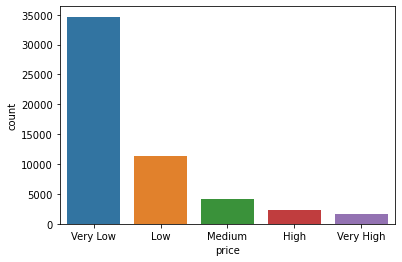

In [108]:
sns.countplot(x='price',data=df)

<AxesSubplot:xlabel='depth', ylabel='table'>

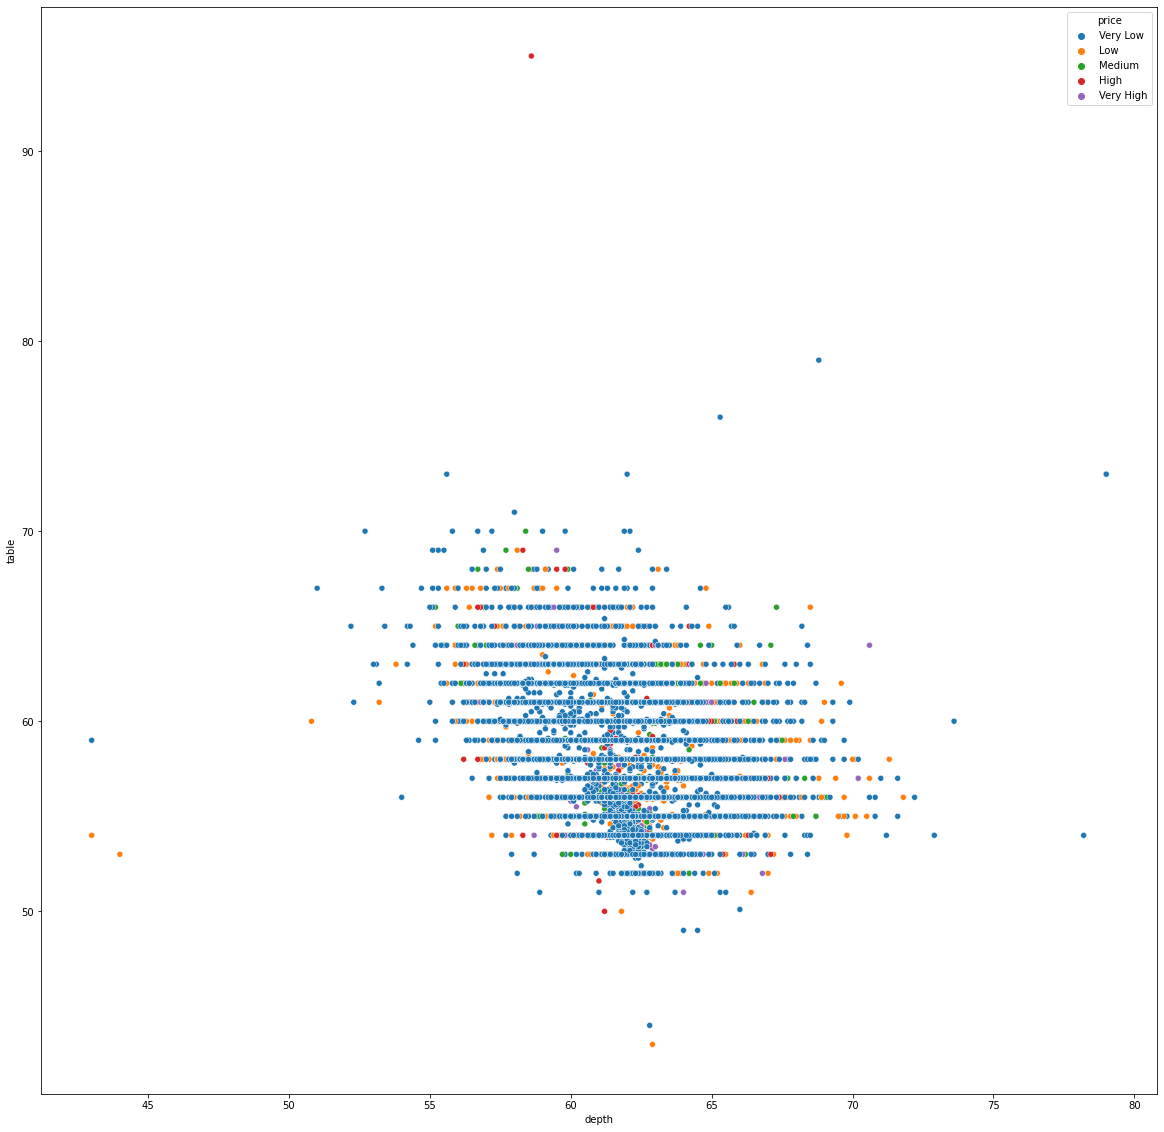

In [109]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='depth',y='table',hue='price',data=df)

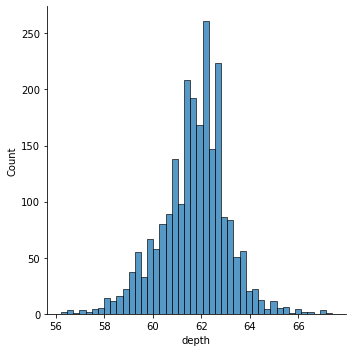

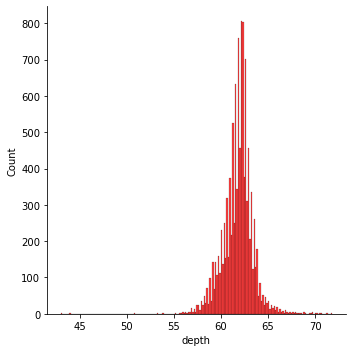

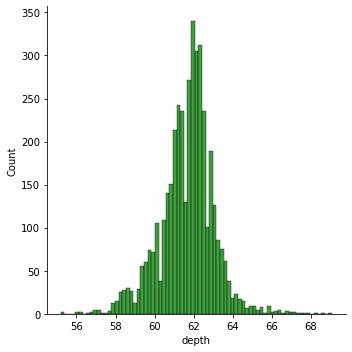

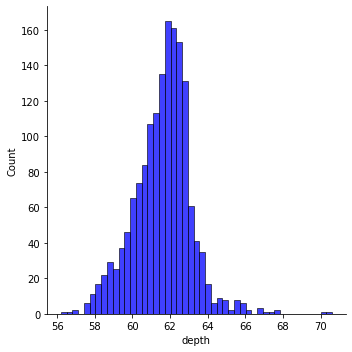

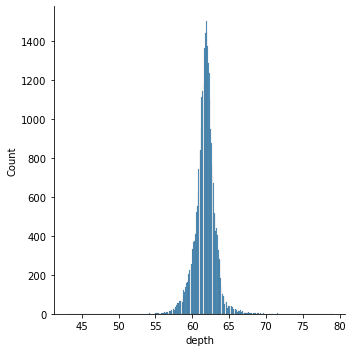

In [110]:
sns.displot(df[df.price == 'High'].depth)
sns.displot(df[df.price == 'Low'].depth,color="r")
sns.displot(df[df.price == 'Medium'].depth,color="g")
sns.displot(df[df.price == 'Very High'].depth,color="b")
sns.displot(df[df.price == 'Very Low'].depth)

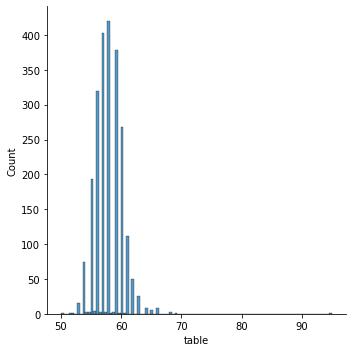

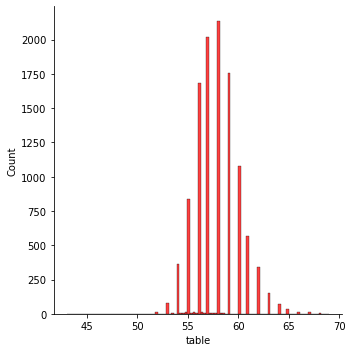

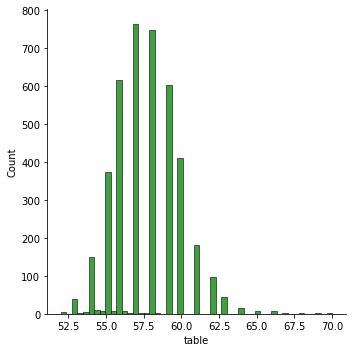

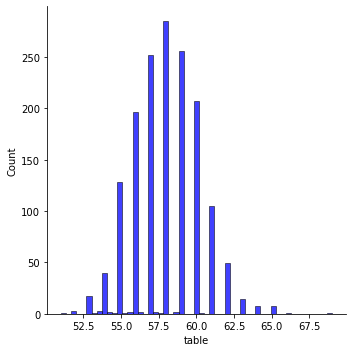

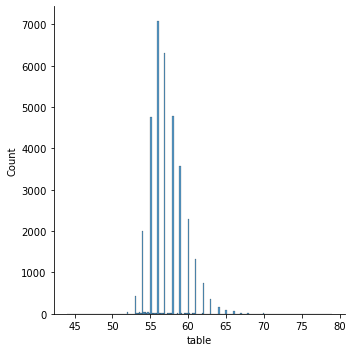

In [37]:
sns.displot(df[df.price == 'High'].table)
sns.displot(df[df.price == 'Low'].table,color="r")
sns.displot(df[df.price == 'Medium'].table,color="g")
sns.displot(df[df.price == 'Very High'].table,color="b")
sns.displot(df[df.price == 'Very Low'].table)

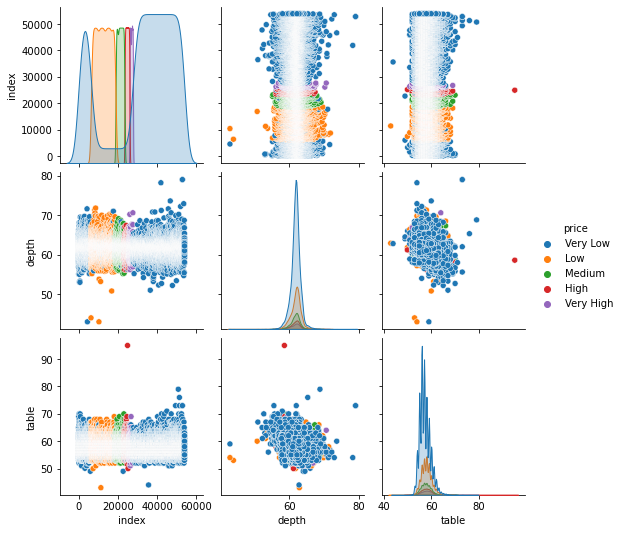

In [111]:
sns.pairplot(df,hue='price')

In [112]:
corr = df.corr()

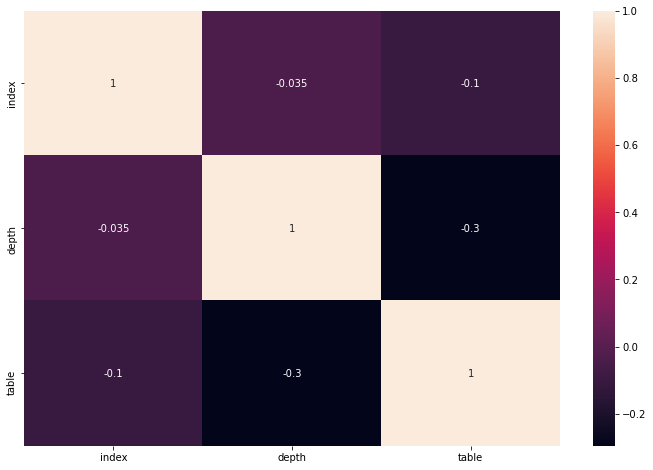

In [113]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)
plt.show()

In [114]:
#Preprocessing


In [115]:
df.duplicated().sum()

0

In [116]:
df

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,Mar.95,Mar.98,Þub.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,Mar.89,Mar.84,Þub.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.May,4.Tem,Þub.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.Þub,Nis.23,Þub.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,Nis.34,Nis.35,Þub.75,Very Low
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,May.75,May.76,3.May,Very Low
53936,53937,0.72,Good,D,SI1,63.1,55.0,May.69,May.75,Mar.61,Very Low
53937,53938,0.7,Very Good,D,SI1,62.8,60.0,May.66,May.68,Mar.56,Very Low
53938,53939,0.86,Premium,H,SI2,61.0,58.0,Haz.15,6.Ara,Mar.74,Very Low


In [118]:
df.drop("index",axis=1,inplace=True)

In [119]:
#Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

price_encoder=LabelEncoder()
df["Label"]= price_encoder.fit_transform(df["price"])
df

,carat,cut,color,clarity,depth,table,x,y,z,price,Label
0,0.23,Ideal,E,SI2,61.5,55.0,Mar.95,Mar.98,Þub.43,Very Low,4
1,0.21,Premium,E,SI1,59.8,61.0,Mar.89,Mar.84,Þub.31,Very Low,4
2,0.23,Good,E,VS1,56.9,65.0,4.May,4.Tem,Þub.31,Very Low,4
3,0.29,Premium,I,VS2,62.4,58.0,4.Þub,Nis.23,Þub.63,Very Low,4
4,0.31,Good,J,SI2,63.3,58.0,Nis.34,Nis.35,Þub.75,Very Low,4
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,May.75,May.76,3.May,Very Low,4
53936,0.72,Good,D,SI1,63.1,55.0,May.69,May.75,Mar.61,Very Low,4
53937,0.7,Very Good,D,SI1,62.8,60.0,May.66,May.68,Mar.56,Very Low,4
53938,0.86,Premium,H,SI2,61.0,58.0,Haz.15,6.Ara,Mar.74,Very Low,4


In [120]:
df["Label"].value_counts()

4    34663
1    11271
2     4109
0     2308
3     1589
Name: Label, dtype: int64

In [121]:
#Label encoding & drop
df.drop("price",axis=1,inplace=True)

In [122]:
df.drop(["x","y","z"],axis=1,inplace=True)

In [123]:

price_encoder=LabelEncoder()
df["Label_cut"]= price_encoder.fit_transform(df["cut"])
df

,carat,cut,color,clarity,depth,table,Label,Label_cut
0,0.23,Ideal,E,SI2,61.5,55.0,4,2
1,0.21,Premium,E,SI1,59.8,61.0,4,3
2,0.23,Good,E,VS1,56.9,65.0,4,1
3,0.29,Premium,I,VS2,62.4,58.0,4,3
4,0.31,Good,J,SI2,63.3,58.0,4,1
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,4,2
53936,0.72,Good,D,SI1,63.1,55.0,4,1
53937,0.7,Very Good,D,SI1,62.8,60.0,4,4
53938,0.86,Premium,H,SI2,61.0,58.0,4,3


In [124]:
df.drop("cut",axis=1,inplace=True)

In [126]:
price_encoder=LabelEncoder()
df["Label_color"]= price_encoder.fit_transform(df["color"])
df

,carat,color,clarity,depth,table,Label,Label_cut,Label_color
0,0.23,E,SI2,61.5,55.0,4,1,1
1,0.21,E,SI1,59.8,61.0,4,1,1
2,0.23,E,VS1,56.9,65.0,4,1,1
3,0.29,I,VS2,62.4,58.0,4,5,5
4,0.31,J,SI2,63.3,58.0,4,6,6
...,...,...,...,...,...,...,...,...
53935,0.72,D,SI1,60.8,57.0,4,0,0
53936,0.72,D,SI1,63.1,55.0,4,0,0
53937,0.7,D,SI1,62.8,60.0,4,0,0
53938,0.86,H,SI2,61.0,58.0,4,4,4


In [127]:
df.drop("color",axis=1,inplace=True)

In [129]:
price_encoder=LabelEncoder()
df["Label_clarity"]= price_encoder.fit_transform(df["clarity"])
df

,carat,clarity,depth,table,Label,Label_cut,Label_color,Label_clarity
0,0.23,SI2,61.5,55.0,4,1,3,3
1,0.21,SI1,59.8,61.0,4,1,2,2
2,0.23,VS1,56.9,65.0,4,1,4,4
3,0.29,VS2,62.4,58.0,4,5,5,5
4,0.31,SI2,63.3,58.0,4,6,3,3
...,...,...,...,...,...,...,...,...
53935,0.72,SI1,60.8,57.0,4,0,2,2
53936,0.72,SI1,63.1,55.0,4,0,2,2
53937,0.7,SI1,62.8,60.0,4,0,2,2
53938,0.86,SI2,61.0,58.0,4,4,3,3


In [131]:
df.drop("clarity",axis=1,inplace=True)

In [132]:
df

,carat,depth,table,Label,Label_cut,Label_color,Label_clarity
0,0.23,61.5,55.0,4,1,3,3
1,0.21,59.8,61.0,4,1,2,2
2,0.23,56.9,65.0,4,1,4,4
3,0.29,62.4,58.0,4,5,5,5
4,0.31,63.3,58.0,4,6,3,3
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,4,0,2,2
53936,0.72,63.1,55.0,4,0,2,2
53937,0.7,62.8,60.0,4,0,2,2
53938,0.86,61.0,58.0,4,4,3,3


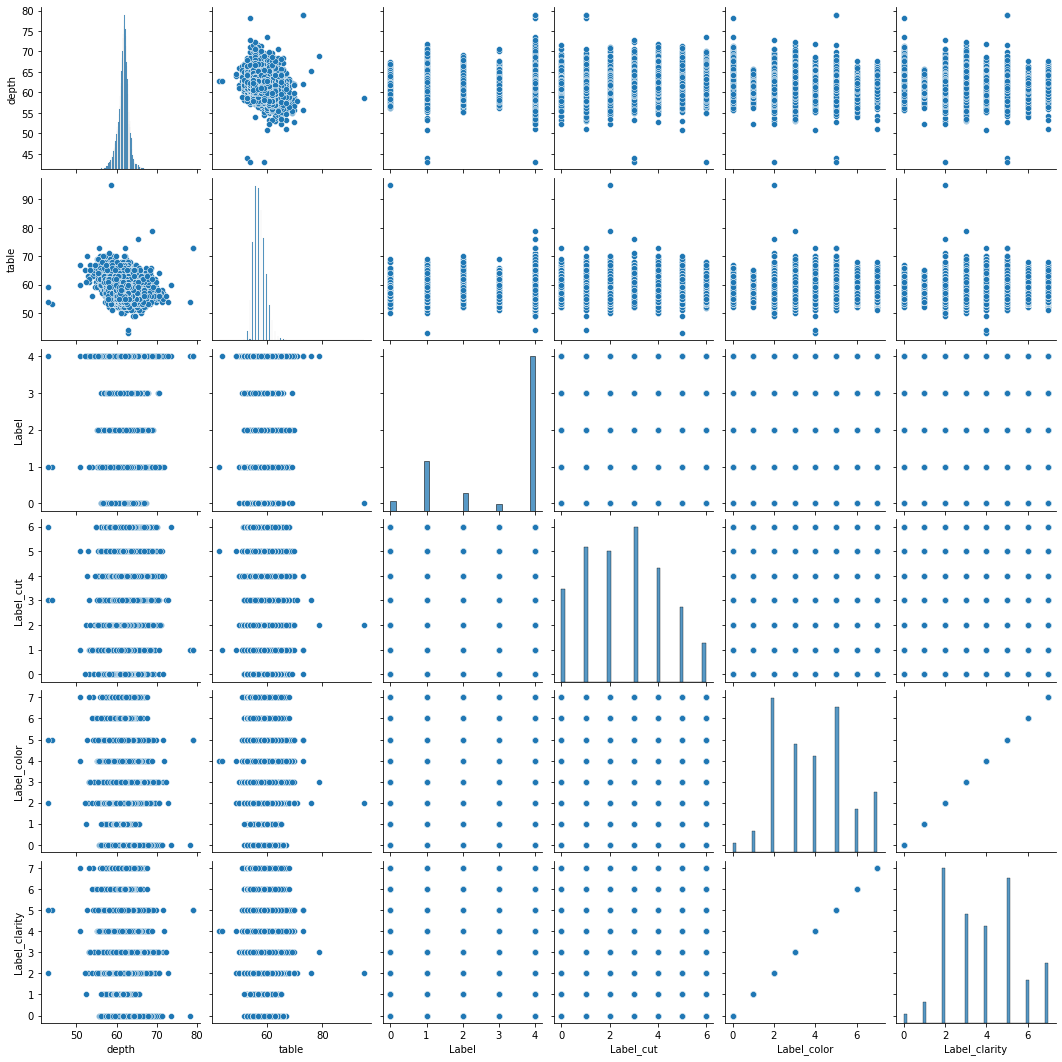

In [133]:
sns.pairplot(df)

In [153]:
df.drop("carat",axis=1,inplace=True)

In [154]:
#Feature Scaling-Standardization
from sklearn import preprocessing
standard = preprocessing.StandardScaler().fit(df[["depth","Label_cut","Label_color","Label_clarity","table"]])
df_standard= standard.transform(df[["depth","Label_cut","Label_color","Label_clarity","table"]])

In [155]:
X,y = df.iloc[: , :-1],df.iloc[: , -1]

In [156]:
#Train-Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [158]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=4, random_state=42)
model_dt.fit(X_train,y_train)
print("DT_Train score: ",model_dt.score(X_train,y_train))
print("DT_Test score: ",model_dt.score(X_test,y_test))

DT_Train score:  0.9319349541818952
DT_Test score:  0.9329501915708812


>1, train: 0.471, test: 0.465
>2, train: 0.674, test: 0.672
>3, train: 0.839, test: 0.837
>4, train: 0.932, test: 0.933


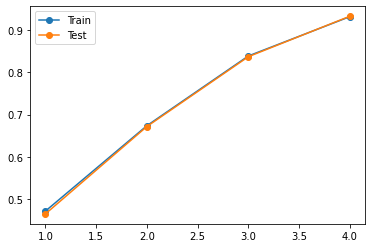

In [163]:
#Train-Test visualization
train_scores, test_scores = list(), list()
values = [i for i in range(1, 5)]
for i in values:

    model = DecisionTreeClassifier(max_depth=i)

    model.fit(X_train, y_train)

    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)

    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [165]:
#Generating Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score
from sklearn.metrics import precision_score,recall_score,accuracy_score,classification_report,f1_score
prediction = model_dt.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       1.00      1.00      1.00       542
           2       1.00      1.00      1.00      3848
           3       1.00      1.00      1.00      2807
           4       1.00      1.00      1.00      2448
           5       1.00      1.00      1.00      3673
           6       0.00      0.00      0.00      1085
           7       0.59      1.00      0.74      1551

    accuracy                           0.93     16182
   macro avg       0.82      0.88      0.84     16182
weighted avg       0.89      0.93      0.91     16182



C:\Users\Elif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [166]:
print("Precision = {}".format(precision_score(y_test, prediction, average='macro')))
print("Recall = {}".format(recall_score(y_test, prediction, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, prediction)))
print("F1 Score = {}".format(f1_score(y_test, prediction,average='macro')))

Precision = 0.823548937784522
Recall = 0.875
Accuracy = 0.9329501915708812
F1 Score = 0.8426080726056843


C:\Users\Elif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


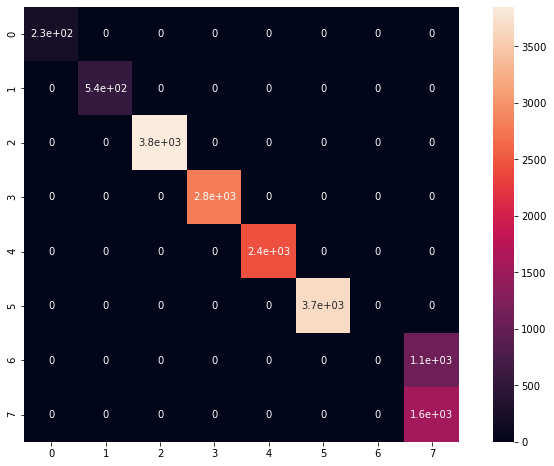

In [169]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,prediction)
plt.figure(figsize=(12,8))
sns.heatmap(cm,square=True,annot=True,cbar=True)
plt.show()

In [171]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

model_lr= LogisticRegression(random_state=42)
model_lr.fit(X_train,y_train)
print("LR_Train score: ",model_lr.score(X_train,y_train))
print("LR_Test score: ",model_lr.score(X_test,y_test))

LR_Train score:  0.8421791408443244
LR_Test score:  0.8422939068100358


C:\Users\Elif\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [173]:
#Generating Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score

prediction = model_lr.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       228
           1       0.00      0.00      0.00       542
           2       0.83      1.00      0.91      3848
           3       0.98      0.99      0.99      2807
           4       0.67      0.60      0.63      2448
           5       0.76      0.81      0.78      3673
           6       0.98      0.94      0.96      1085
           7       0.97      1.00      0.99      1551

    accuracy                           0.84     16182
   macro avg       0.65      0.67      0.66     16182
weighted avg       0.80      0.84      0.82     16182



C:\Users\Elif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [174]:
print("Precision = {}".format(precision_score(y_test, prediction, average='macro')))
print("Recall = {}".format(recall_score(y_test, prediction, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, prediction)))
print("F1 Score = {}".format(f1_score(y_test, prediction,average='macro')))

Precision = 0.6497280827282064
Recall = 0.6668454741030526
Accuracy = 0.8422939068100358
F1 Score = 0.6568907018046284


C:\Users\Elif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


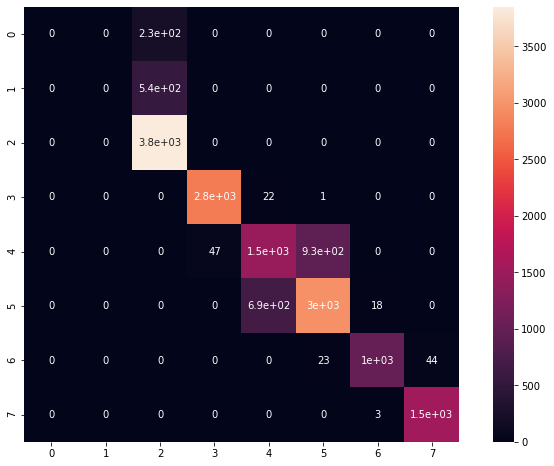

In [175]:
#Confusion Matrix
cm= confusion_matrix(y_test,prediction)
plt.figure(figsize=(12,8))
sns.heatmap(cm,square=True,annot=True,cbar=True)
plt.show()

In [179]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(max_depth=4,random_state=42)
model_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [183]:
print("RFC_Train score: ",model_rfc.score(X_train,y_train))
print("RFC_Test score: ",model_rfc.score(X_test,y_test))

RFC_Train score:  0.8215212670162615
RFC_Test score:  0.8212211098751699


>1, train: 1.000, test: 1.000
>2, train: 1.000, test: 1.000
>3, train: 1.000, test: 1.000
>4, train: 1.000, test: 1.000


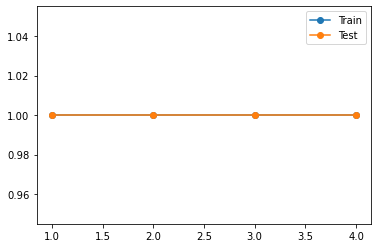

In [184]:
#Train&Test visualization
train_scores, test_scores = list(), list()
values = [i for i in range(1, 5)]
for i in values:

    model = RandomForestClassifier(random_state=42)

    model.fit(X_train, y_train)

    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)

    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [185]:
##Generating Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score

prediction = model_rfc.predict(X_test)
print("Precision = {}".format(precision_score(y_test, prediction, average='macro')))
print("Recall = {}".format(recall_score(y_test, prediction, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, prediction)))
print("F1 Score = {}".format(f1_score(y_test, prediction,average='macro')))

Precision = 0.6880109418963445
Recall = 0.720787604547872
Accuracy = 0.8212211098751699
F1 Score = 0.6957584950245292


C:\Users\Elif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


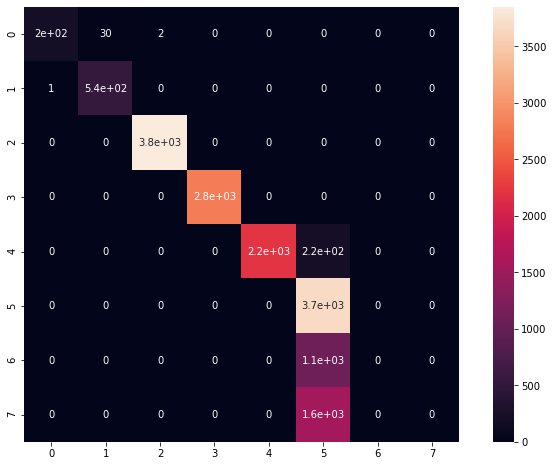

In [186]:
#Confusion Matrix
cm= confusion_matrix(y_test,prediction)
plt.figure(figsize=(12,8))
sns.heatmap(cm,square=True,annot=True,cbar=True)
plt.show()

# Result

Veri seti üzerinde 3 farklı classifikasyon modeli denendi.Bunlar Decision Tree,Random Forest ve Logistic Regresyondur. Test-Train grafik karşılaştırmaları, heatmap ve score tabloları incelendiğinde bu veri seti için en iyi sonucu Decision Tree vermiştir. Train ve Test ortak şekilde doğru sonuçlar vermiştir.